# Week 10 assignment is very similar to the tasks in weeks 3 and 7...

### BUT IT IS A BIT EASIER (because you have so much other coursework to do)

### You are given an API to use. You are given an overall structure of a business question to ask ( similar to last time)

Use the Companies house API described below.

This dataset is HUGE, so have a look around it and see what questions can be answered. Below you will find a suggestion of what you could ask. You do not need to follow the exact question format below, but it might make this task easier for you. Look at the data - what type of questions can they answer?

The question does not need to be complicated. Your task is to use python to operate on data, find the answer and support it with a graph or well-crafted table.


### Deliverable  (same as last time)

In your notebook please include all the code that you used to arrive at the conclusion. Also 

At the end of your notebook, you should provide:

- a markdown (text) cell with your mini-report (200 words +/- 10%). For reference, 'Marking criteria' section below has around 220 words)
- a cell which will generate the graph or table that accompanies your mini-report (you are allowed to combine number of graphs, if they are combined into one unit and make sense, eg. combining 3 bar charts side by side, or overlapping a line chart with a bar chart).

### Marks (same as last time)

| Attribute                                                                                                                                                                                                                                                                                                                                        | 50% - C - GOOD                                                                     | 60% - B - VERY GOOD                                                                                   | 70% - A - EXCELLENT                                                                                         |
| :-- | :-- | :-- | :-- |
|                                                                                                                                                                                                                                                                                                                                                  |                                                                                    |                                                                                                       |                                                                                                             |
| Business Question and Answer: Did you manage to find a question that can be answered with given data? As an analyst you will often have to dive into available data and identify how it ccan help the business, or solve a problem, withou first knowing what the problem is. Also can you formulate a clear answer to the question you created? | + question and answer are clear, well defined and connect with the dataset         | + argument is clearly positioned in a business context, and attempts to provide value/insight         | + insights are novel, actionable and the writeup is of publishable quality.                                 |
| Using the Data: How well did you use the data to answer your question? Your answer should be supported by what you found in the data. Briefly describe why this was the correct data, and correct analysis to perform on it.                                                                                                                     | + data selected is apropriate for the task, analysis is clear, source is mentioned | + data analysis section advances the argument, makes a clear point and is easy to read and understand | + analysis is insightfull, using multiple part of the data set in a creative way                            |
| Visualisation: Can you aid your argument/aswer with visual clues? Graph can say a thousand words, but it is also easy to make one which is confusing, or misleading. Use simple (or highly customised) graphs to make your argument clearer.                                                                                                     | + graph is communicative, appropriate and simmilar complexity as in the notes      | + graph is customised and combines a number of styles and types of visualisation                      | + graph is using clear visual language to make a point, adds to the argument, and is of publishable quality |
| Code Quality: Is your code clean, readable and DRY (Don't repeat yourself)? Are you using good readable variable names? Did you clean up your code and does it not include any old/unused parts?                                                                                                                                                 | + code has meaningful variable names, no needlessly repeated code                  | + also signposted, reasonably commented and cleaned up                                                | + also code has logical flow, consistency of names and gralularity/size                                     |
| Code Structure: Is your code well structured and broken down? Just like good writing has sentences, paragraphs and chapters, good code should be split into sections. Breakdown your code into cells and functions. Use meaningful signposts (eg. comments, function names) to guide the reader through your code.                               | + code is broken down into cells, by the code's purpose                            | + code is is broken down by cell and also separated and readable. Attempts on reusing code are made   | + code is split into functions and/or objects and can be easilly reused                                     |


# API we will Use: Companies House

Companies house is the official public  register of all companies in the UK. You can search for companiers, peope etc. You can also get basic information about many companies, or request detailed information about one company. You will need to create an account - probably best if you use your university email address. You can find more information on companies house website and https://developer.company-information.service.gov.uk/get-started. 

# How to create a company house developer account:

note: depending on your setup, links might not work when you click them. You can try right-click and 'copy link address', or just copy-pasting these links.

- Go to 'register a user account' link https://identity.company-information.service.gov.uk/oauth2/user/signin, enter your **school email** and then click the link you received by email
- setup a password
- login to https://identity.company-information.service.gov.uk/oauth2/user/signin
- go to New Application on top (https://developer.company-information.service.gov.uk/manage-applications/add)
- ented a name and short description for your API project (just say it's a univeristy project) and choose **Live in 'environment for your application'**. Leave other options blank.
- go to 'View all applications' (https://developer.company-information.service.gov.uk/manage-applications)
- click on the name of your application, and then 'Create new key'
- Select these options:
-    Key name and description: here write anything, like 'python project'
-    Select the type of API client key you want to create: REST
- leave other options empty, and click 'Create Key'
- When done, scroll down and copy-paste yoru key to this notebook. key will look a bit like this: 	e3aaad12-fd44-4aad-9389-f7dccccc67f9

Once you are set up:

- all the possible requests can be found here: https://developer-specs.company-information.service.gov.uk/companies-house-public-data-api/reference
- by the way: you are allowed to ask 600 requests within each five-minute period, after that persiod, you get another 600. If you use up all the 600 questions, API will make you wait for a few seconds/minutes.

# Some functions to get you started: 



In [1]:
# list of library for this project
import requests
import pprint as pp
import datetime
from datetime import date 
from datetime import datetime
# you might need to add a few of your own
import numpy as np
import pandas as pd
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from statistics import mean
import math

In [2]:
# function for calling the API to retrieve JSON
def call_api_with(url_extension):
    your_company_house_api_key ="be0ce292-0b62-42e0-9a4c-39c4024bf3c7"
    login_headers = {"Authorization":your_company_house_api_key}
    url = f"https://api.companieshouse.gov.uk/{url_extension}"
    # above: could be eg. https://api.companieshouse.gov.uk/search/companies?q=shop&items_per_page=1
    print(f'requesting: {url}') 
    # above, optional: printing, so that you see visually how many calls you are making
    res = requests.get(url, headers=login_headers) #, verify=False)
    return res.json()

# test to get one company
def get_one_test_company_or_error():
    url = f"search/companies?q=shop&items_per_page=1"
    return call_api_with(url)

# search company with specific query / keyword
def search_for_companies_with_query(query, optionalNumber_of_companies = 200):
    url = f"search/companies?q={query}&items_per_page={optionalNumber_of_companies}"
    return call_api_with(url).get('items', [])

def search_for_companies_with_query(query, number_of_companies = 100):
    # for simplicity round up the number of returned companies to the nearest hundred. 
    #     so if 130 are requested, just return 200 companies. for 360 requested return 400. 
    page_size = 100
    number_of_pages = math.ceil(number_of_companies / page_size) # round up
    companies = []
    for page_index in range(0, number_of_pages):
        url = f"search/companies?q={query}&items_per_page={page_size}&index_start={page_index*page_size}"
        companies += call_api_with(url).get('items', [])
    return companies

# request to get company data based on company number
def data_for_company(company_number):
    url = f"company/{company_number}"
    return call_api_with(url)

# get all persons with significant control from company which contains specific keyword
def all_persons_in_company(company_number):
    url = f"company/{company_number}/persons-with-significant-control"
    return call_api_with(url).get('items', [])

def detailed_info_about_companies_with_ids(companies_numbers):
    results = []
    for company_number in companies_numbers:
        results.append(data_for_company(company_number))
    return results
    # when calling this, think - how will you get just the ids from search_for_companies_with_query?
    # maybe you could write another function that will combine search and detailed_info ?
    
def get_companies_numbers(query,optionalNumber=200):
    companies = search_for_companies_with_query(query, optionalNumber_of_companies = optionalNumber)
    just_ids = [company['company_number'] 
                for company in companies]
    return just_ids

# Some warm up tasks:

### (you do not have to do them, but they will help you explore the data)

- find all information of first 100 companies with a word 'Bagel' in the name (or just use any other word you like)
- from all those companies, how would you get those that are still active? can you calculate how old they are on average?
- and for those that are not active, how long did they exist? You can use date_of_creation and date_of_cessation.
- now grab only the company_numbers of companies that are still active and existed for over 10 years
- use the function all_persons_in_company to find all significant people in these companies. What can you say about their nationalities?


# Your Assignment:

Look at two groups of companies. Ask a question about some detail about them that you can find in the data.

- Pick two (or more) groups of companies, described with words that are somehow opposite in meaning, or describe two different aspects of something eg. local vs foreign, old vs new, cheap vs expensive, coffee vs tea, bagel vs bread, shortbread vs candy, car vs bicycle. 
- Look at these companies. Use functions given before and build your own
- Create a business question, and then validate if it is true using data and Python.
- at the end write a short mini-report about your findings - you might want to compliement it with a graph based on your data.

### Example questions:

- 'Is lifespan of Crypto companies short?' - what patterns can you see in the 'company_status' (i.e. 'active' vs 'dissolved') of companies with these words in name? (eg. what word in the name has higher likelihood that the company is dissolved: 'crypto' or 'gold')
- 'What are top five British cities with coffee **roasteries**'? Are they the same cities where you would find many **cafe**s'?' - what are the most popular cities for companies with these words in the name? (eg. are the top cities different for companies with name containing 'haggis' and 'pudding')
- 'Owners of **digital** companies are not much younger than owners of **bank**ing companies' - are people with signifficant control, on average, older in companies with one word or another (other example: are people are in companies with 'car' in the name, younger than people in companies with 'bicycle' in the name).

In [ ]:
# write your code

In [3]:
# regard the higher number in the string as the voting rights
def int_from_voting_string(voting_string):
    if voting_string.count("voting"):
        return int(voting_string.split("-")[4])
    else:
        return 0
#     input: 'voting-rights-25-to-50-percent'
#     output: 50

assert int_from_voting_string('voting-rights-25-to-50-percent') == 50
assert int_from_voting_string('voting-rights-0-to-25-percent') == 25
assert int_from_voting_string('ownership-of-shares-25-to-50-percent') == 0

# get the voting rights in the long nature of control list
def number_of_voting_rights(all_rights):
    voting_percents = [int_from_voting_string(one_right)
                       for one_right in all_rights
                       if one_right.count("voting")]
    return sum(voting_percents)
#     eg. input: ['ownership-of-shares-75-to-100-percent',
#    'voting-rights-25-to-50-percent',
#    'right-to-appoint-and-remove-directors']
#     
#     output: 50
assert number_of_voting_rights(['ownership-of-shares-75-to-100-percent','voting-rights-25-to-50-percent']) == 50
assert number_of_voting_rights(['ownership-of-shares-75-to-100-percent','voting-rights-0-to-25-percent']) == 25
assert number_of_voting_rights(['ownership-of-shares-75-to-100-percent']) == 0

# regard the higher number in the string as the ownership
def int_from_ownership_string(ownership_string):
    if ownership_string.count('ownership') and len(ownership_string.split("-"))==7:
        return int(ownership_string.split("-")[5])
    else:
        return 0
#test
assert int_from_ownership_string('ownership-of-shares-75-to-100-percent')==100
assert int_from_ownership_string('ownership-of-shares-50-to-75-percent')==75
assert int_from_ownership_string(['ownership-of-shares-75-to-100-percent-as-trust'])==0

# get the voting rights in the long nature of control list
def number_of_ownership(all_rights):
    ownership_percents = [int_from_ownership_string(one_right)
                       for one_right in all_rights
                       if one_right.count("ownership")]
    return sum(ownership_percents)

#test
assert number_of_ownership(['ownership-of-shares-75-to-100-percent','voting-rights-25-to-50-percent']) == 100
assert number_of_ownership(['ownership-of-shares-25-to-50-percent','voting-rights-0-to-25-percent']) == 50
assert number_of_ownership(['ownership-of-shares-75-to-100-percent','ownership-of-shares-75-to-100-percent-as-trust']) == 100
assert number_of_ownership(['voting-rights-25-to-50-percent']) == 0


# save essential information of persons in a DataFrame
# each person's information is on one row
def save_info_to_df(df,companies,company_field):
    for company in companies:
        for person in all_persons_in_company(company['company_number']): 
            df=df.append({'company_field':company_field,'company_number':company['company_number'],
                                     'status':company['company_status'],
                                     'name':person['name'],
                                     'notified_date':person.get('notified_on',None),
                                    'age':2021-int(person.get("date_of_birth",{}).get('year',2021)),
                                    "nationality":person.get('nationality','Others'),
                                    "voting_rights":number_of_voting_rights(person.get('natures_of_control','')),
                                    "ownership":number_of_ownership(person.get('natures_of_control',''))},
                                    ignore_index=True)
            
    df = df.drop(df[df.nationality=='Others'].index)
    df=df.reset_index(drop=True)
    return df

# get nationalities in specific group and the number of people in each nationality
def get_nationality(df,field):
    # calculate the size of each nationality group
    nationality=df.groupby('nationality').size()
    nationality_dict=nationality.to_dict()
    
    for k in nationality_dict.keys():
        # combine welsh, English and Scottish as British in the dictionary
        if k==('Welsh' or 'English' or 'Scottish' or 'United Kingdom'):
            nationality_dict["British"]+=nationality_dict[k]
        else:
            continue
    
    # delete welsh, English and Scottish in dictionary
    nationality_dict.pop('Welsh','No')
    nationality_dict.pop('English','No')
    nationality_dict.pop('Scottish','No')
    nationality_dict.pop('United Kingdom','No')
    
    return nationality_dict

# create pie chart for companies in each field
def get_pie_chart(which_field_nationality,title):
    # delete the key of british, because we only want to focus on the diversity of foreigners in pie chart.
    which_field_nationality.pop('British')
    
    labels=list(which_field_nationality.keys())
    values=list(which_field_nationality.values())

    explode=[0]*len(which_field_nationality)
    explode[0]=0.2
    
    plt.pie(values,explode=explode,labels=labels, shadow=False, startangle=80)

    # This function makes the axes equal, so the circle is round
    plt.axis('equal')
    plt.title(title)
    
# Calculate the mean of voting rights and ownership for british and foreigners
def voting_and_ownership(df,nature_of_control):
    control_british=0
    control_foreigners=0
    british=0
    foreigners=0
    for j in range(len(df)):
        # combine british nationality
        if df.loc[j,'nationality']==('British' or 'Welsh' or 'English' or 'Scottish' or 'United Kingdom'):
            control_british+=df.loc[j,nature_of_control]
            british+=1
        # delete others, because they are noisy data
        # we are not sure whether others refers to British or foriegners
        elif df.loc[j,'nationality']== 'Others':
            continue
        else:
            control_foreigners+=df.loc[j,nature_of_control]
            foreigners+=1
    # calculate the mean of percentage
    control_british=control_british/british
    control_foreigners=control_foreigners/foreigners
    
    # return two variables in a tuple
    return (control_british,control_foreigners)


# Double Bar Chart - voting rights & ownership
def get_double_bar_chart(nature_of_control,ylabel,title):
    # set up two groups
    X = ['manufacturing','tour']
    
    # set up british and foreigners y label
    YBritish = [voting_and_ownership(df_manu,nature_of_control)[0],voting_and_ownership(df_tour,nature_of_control)[0]]
    ZForeigner = [voting_and_ownership(df_manu,nature_of_control)[1],voting_and_ownership(df_tour,nature_of_control)[1]]
    # set up x axis
    X_axis = np.arange(len(X))
    # draw double bar chart
    plt.bar(X_axis - 0.2, YBritish, 0.4, label = 'British')
    plt.bar(X_axis + 0.2, ZForeigner, 0.4, label = 'Foreigner')

    plt.xticks(X_axis, X)
    plt.xlabel("Groups")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()

In [4]:
# call api to search for manufacturing and tour companies
manufacturing_companies = search_for_companies_with_query("manufacture",  number_of_companies = 200)
tour_companies = search_for_companies_with_query("tour",  number_of_companies = 200)

requesting: https://api.companieshouse.gov.uk/search/companies?q=manufacture&items_per_page=100&index_start=0
requesting: https://api.companieshouse.gov.uk/search/companies?q=manufacture&items_per_page=100&index_start=100
requesting: https://api.companieshouse.gov.uk/search/companies?q=tour&items_per_page=100&index_start=0
requesting: https://api.companieshouse.gov.uk/search/companies?q=tour&items_per_page=100&index_start=100


In [5]:
# create a dataFrame and save essential persons information in the df
df_persons=pd.DataFrame(columns=['company_field','company_number','status',
                                 'name','notified_date','age',
                                 'nationality','voting_rights','ownership'])
# use functions to save the information of significant persons in manufacturing companies and tour companies to two dataframes
df_manu=save_info_to_df(df_persons,manufacturing_companies,"manufacturing")
df_tour=save_info_to_df(df_persons,tour_companies,"tour")

requesting: https://api.companieshouse.gov.uk/company/04813682/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/10901552/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/05562492/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/13306675/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/10355655/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/12414538/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/09210945/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/12440455/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/11122638/persons-with-significant-control
requesting: https://api.companieshouse.gov.uk/company/11548075/persons-with-significant-control
requesting: https://api.companieshouse.g

In [6]:
# get two fields companies' nationality dictionary
manu_nationality=get_nationality(df_manu,'manufacturing')
tour_nationality=get_nationality(df_tour,'tour')

In [ ]:
# write your short report at the very end.

### Which industry should the UK government invest in for increasing managerial diversification in 2022? 

The UK government plans to invest in two industries to attract foreign firm owners to increase managerial diversification. Which industry should the UK government focus on if it has to choose between manufacturing and tourism industries? 

We query the data of significant persons in the first 400 companies with keywords ‘manufacture’ and ‘tour’. We also plot pie charts of nationality and double bar charts of voting rights and ownership.

Interestingly, we discovered that the tourism industry has much more nationality diversity with 17 nationalities compared to only 12 nationalities in the manufacturing industry as shown in the pie charts. Surprisingly, the double bar charts show that generally, the foreign managers have high percentages of voting rights and ownership. In detail, the British have stronger voting rights in the manufacturing industry with 46% as shown in the left double chart. On the opposite, foreigners have a larger mean of voting rights in the tourism industry with 77%. Furthermore, based on the right double chart, we observed that on average foreigners have more ownership than British, and the average ownership in the manufacturing industry is slightly higher than that in the tourism industry.

In conclusion, the government can focus on attracting more foreign investors to start businesses in the manufacturing sector in the UK to get the overall benefits of business competitiveness.

[world count] =220

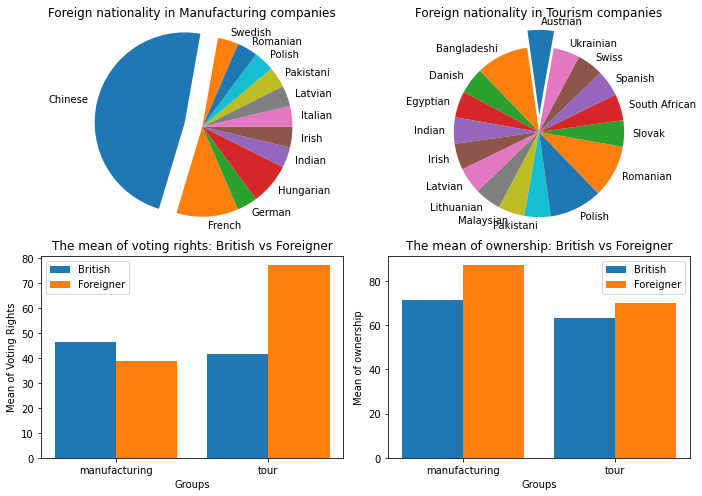

In [7]:
# draw four figures in one plot
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(10,7))

# pie chart
plt.subplot(2,2,1)
get_pie_chart(manu_nationality,'Foreign nationality in Manufacturing companies')

plt.subplot(2,2,2)
get_pie_chart(tour_nationality,'Foreign nationality in Tourism companies')

# double bar chart
plt.subplot(2,2,3)
get_double_bar_chart("voting_rights","Mean of Voting Rights","The mean of voting rights: British vs Foreigner")

plt.subplot(2,2,4)
get_double_bar_chart("ownership","Mean of ownership","The mean of ownership: British vs Foreigner")

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.show()